<a href="https://colab.research.google.com/github/Nischal36/AedesLarvae/blob/main/resnet50graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [6]:
data_dir=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/ds")


img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
   "/content/gdrive/MyDrive/ds",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 664 files belonging to 2 classes.
Found 664 files belonging to 2 classes.
Using 532 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/gdrive/MyDrive/ds",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 664 files belonging to 2 classes.
Using 132 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)
import tensorflow_datasets as tdfs

batch_size = 32

dataset_name = data_dir
class_names = data_dir.class_names
num_classes = len(class_names)
print(class_names)

# Define the desired image size
size = (224, 224)

def preprocess_image_label(image, label):
    image = tf.image.resize(image, size)
    # Convert label to one-hot encoding
    label = tf.one_hot(tf.cast(label, tf.int32), depth=num_classes)
    return image, label

ds_train_encoded = train_ds.map(preprocess_image_label)
ds_validation_encoded = val_ds.map(preprocess_image_label)

for image, label in ds_train_encoded.take(1):  # Taking one batch for example
    print("Image shape:", image.shape)
    print("Label shape:", label.shape)


['Testing', 'Training']
['Testing', 'Training']
Image shape: (32, 224, 224, 3)
Label shape: (32, 2)


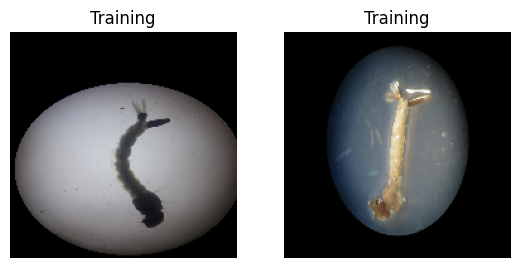

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(2):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [9]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 1)                 513       
 apper)                                                          
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [11]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
epochs=10
history=resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
17/17 [==============================] - 136s 8s/step - loss: 1.0105 - accuracy: 0.7068 - val_loss: 0.8654 - val_accuracy: 0.7576
Epoch 2/10
17/17 [==============================] - 126s 7s/step - loss: 0.6075 - accuracy: 0.7763 - val_loss: 0.8022 - val_accuracy: 0.7803
Epoch 3/10
17/17 [==============================] - 125s 7s/step - loss: 0.4700 - accuracy: 0.7951 - val_loss: 0.4901 - val_accuracy: 0.7424
Epoch 4/10
17/17 [==============================] - 106s 6s/step - loss: 0.4191 - accuracy: 0.8102 - val_loss: 0.5719 - val_accuracy: 0.7803
Epoch 5/10
17/17 [==============================] - 126s 7s/step - loss: 0.4013 - accuracy: 0.8139 - val_loss: 0.5911 - val_accuracy: 0.6591
Epoch 6/10
17/17 [==============================] - 103s 6s/step - loss: 0.3849 - accuracy: 0.8139 - val_loss: 0.5101 - val_accuracy: 0.7348
Epoch 7/10
17/17 [==============================] - 122s 7s/step - loss: 0.3848 - accuracy: 0.8008 - val_loss: 0.5332 - val_accuracy: 0.6742
Epoch 8/10
17

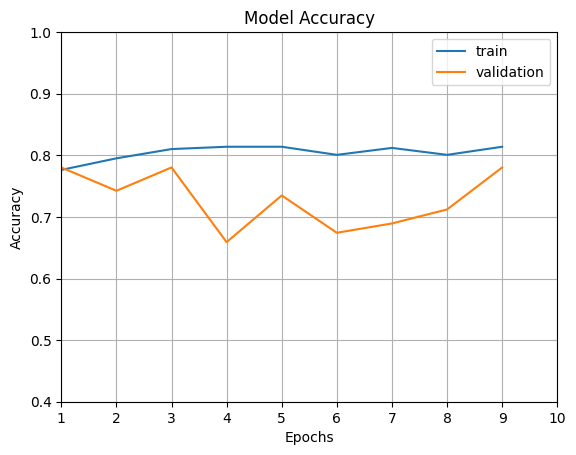

In [17]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.axis(xmin=1,xmax=10)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()